# Task-2 Stock Market Prediction and Forecasting Using Stacked LSTM

# Importing necessary libraries

In [2]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# Loading the dataset

In [4]:
data=pd.read_excel("dataset.xlsx")

# Exploring the dataset

In [7]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [9]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


# selecting 'Close' column for predictions

In [18]:
df = data.reset_index()['Close']
df.shape

(2035,)

In [19]:
df.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [20]:
df.tail()

2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, dtype: float64

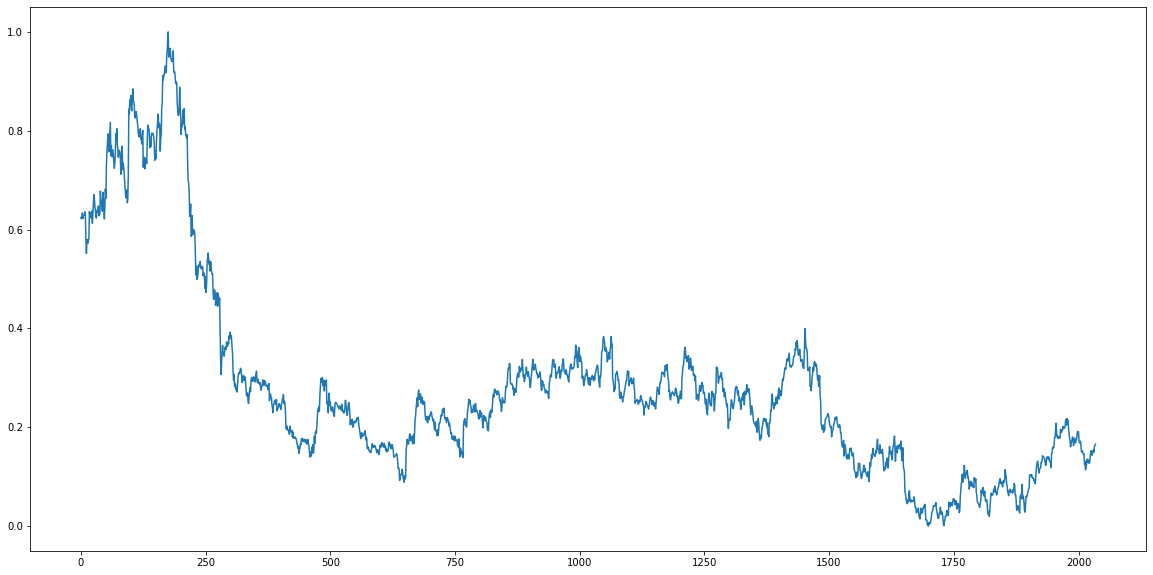

In [43]:
plt.figure(figsize=(20, 10))
plt.plot(df)
plt.show()

# applying MinMaxScaler to scale the data

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df = sc.fit_transform(np.array(df).reshape(-1,1))
df.shape

(2035, 1)

In [23]:
df

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# spliting the dataset into training and testing set

In [24]:
train_size = int(len(df) * 0.75)
test_size = len(df) - train_size
train_size, test_size

(1526, 509)

In [25]:
train_data, test_data = df[0:train_size, :], df[train_size:len(df), :1]

In [26]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.18831699],
       [0.18811275],
       [0.17034314]])

In [27]:
test_data

array([[0.1621732 ],
       [0.15972222],
       [0.16278595],
       [0.17340686],
       [0.14174837],
       [0.15441176],
       [0.16503268],
       [0.15563725],
       [0.14460784],
       [0.13684641],
       [0.13582516],
       [0.14072712],
       [0.14501634],
       [0.14195261],
       [0.13562092],
       [0.15053105],
       [0.15727124],
       [0.15461601],
       [0.15767974],
       [0.15114379],
       [0.14297386],
       [0.14215686],
       [0.14787582],
       [0.13970588],
       [0.11642157],
       [0.11131536],
       [0.10927288],
       [0.10334967],
       [0.09783497],
       [0.10089869],
       [0.10906863],
       [0.10171569],
       [0.11254085],
       [0.12704248],
       [0.12214052],
       [0.12704248],
       [0.11519608],
       [0.11008987],
       [0.0996732 ],
       [0.09640523],
       [0.10089869],
       [0.10886438],
       [0.10866013],
       [0.1186683 ],
       [0.12316176],
       [0.11029412],
       [0.11703431],
       [0.110

# converting array of values to dataset matrix

In [28]:
def make_dataset(data, time_step):
    d1, d2 = [], []
    for i in range(len(data)-time_step-1):  
        d1.append(data[i:(i + time_step), 0])
        d2.append(data[i + time_step, 0])
    return np.array(d1), np.array(d2)

In [29]:
X_train, y_train = make_dataset(train_data, 100)
X_test, y_test = make_dataset(test_data, 100)

In [30]:
print(X_train.shape), print(y_train.shape)

(1425, 100)
(1425,)


(None, None)

In [31]:
print(X_test.shape), print(y_test.shape)

(408, 100)
(408,)


(None, None)

# Reshaping the inputs to be in [samples, time steps, features] format

In [32]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Creating the LSTM model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 6s 139ms/step - loss: 0.0268 - val_loss: 0.0055
Epoch 2/100
23/23 [==============================] - 2s 94ms/step - loss: 0.0026 - val_loss: 7.6438e-04
Epoch 3/100
23/23 [==============================] - 2s 92ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/100
23/23 [==============================] - 2s 92ms/step - loss: 0.0015 - val_loss: 9.0181e-04
Epoch 5/100
23/23 [==============================] - 2s 92ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 2s 97ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/100
23/23 [==============================] - 2s 93ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 2s 93ms/step - loss: 0.0011 - val_loss: 9.9377e-04
Epoch 10/100
23/23 [==============================] - 2s 93ms/step - loss: 0.0010 - va

Epoch 77/100
23/23 [==============================] - 2s 88ms/step - loss: 2.4709e-04 - val_loss: 2.4943e-04
Epoch 78/100
23/23 [==============================] - 2s 93ms/step - loss: 2.6016e-04 - val_loss: 3.3380e-04
Epoch 79/100
23/23 [==============================] - 2s 86ms/step - loss: 2.6040e-04 - val_loss: 2.8013e-04
Epoch 80/100
23/23 [==============================] - 2s 86ms/step - loss: 2.4113e-04 - val_loss: 2.6360e-04
Epoch 81/100
23/23 [==============================] - 2s 85ms/step - loss: 2.4940e-04 - val_loss: 3.4258e-04
Epoch 82/100
23/23 [==============================] - 2s 86ms/step - loss: 2.5974e-04 - val_loss: 2.0674e-04
Epoch 83/100
23/23 [==============================] - 2s 87ms/step - loss: 2.2767e-04 - val_loss: 2.5305e-04
Epoch 84/100
23/23 [==============================] - 2s 87ms/step - loss: 2.2487e-04 - val_loss: 2.1874e-04
Epoch 85/100
23/23 [==============================] - 2s 99ms/step - loss: 2.2652e-04 - val_loss: 2.3240e-04
Epoch 86/100
23/23 

# Making predictions for training and test data

In [38]:
train_pred = sc.inverse_transform(model.predict(X_train))
test_pred = sc.inverse_transform(model.predict(X_test))

# Calculating RMSE for train and test data

In [39]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_pred)), math.sqrt(mean_squared_error(y_test, test_pred))

(165.02362909974994, 107.04374693812028)

# Plotting training and test data predictions

In [40]:
look_back = 100
trainPredPlot = np.empty_like(df)
trainPredPlot[:, :] = np.nan
trainPredPlot[look_back:len(train_pred) + look_back, :] = train_pred

In [41]:
testPredPlot = np.empty_like(df)
testPredPlot[:, :] = np.nan
testPredPlot[len(train_pred) + (look_back*2) + 1:len(df) - 1, :] = test_pred

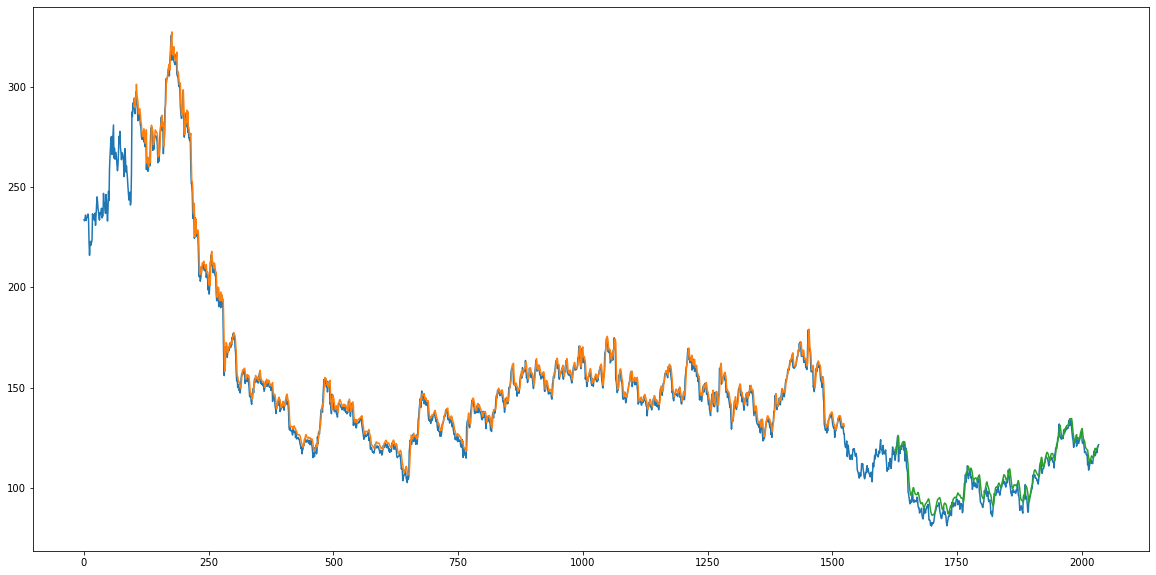

In [44]:
plt.figure(figsize=(20, 10))
plt.plot(sc.inverse_transform(df))
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.show()

In [48]:
X_input = test_data[409:].reshape(1,-1)
X_input.shape

(1, 100)

In [49]:
temp = list(X_input)
temp = temp[0].tolist()
temp

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

# Getting prediction for next 10 days

In [50]:
list_output = []
num_steps=100
i = 0
while (i < 15):
    if(len(temp) > 100):
        X_input = np.array(temp[1:])
        print("Day {} input {}".format(i, X_input))
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1, num_steps, 1))
        yhat = model.predict(X_input, verbose = 0)
        print("Day {} output {}".format(i, yhat))
        temp.extend(yhat[0].tolist())
        temp = temp[1:]
        list_output.extend(yhat.tolist())
        i = i + 1
    else:
        X_input = X_input.reshape((1, num_steps, 1))
        yhat = model.predict(X_input, verbose = 0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(temp))
        list_output.extend(yhat.tolist())
        i = i + 1

print(list_output)

[0.17199458]
101
Day 1 input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

Day 13 output [[0.22528581]]
Day 14 input [0.15992647 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621
 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458
 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248
 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366
 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876 0.21098856
 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497
 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595
 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935
 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065
 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268  0.15196078
 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059
 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967 0.12806373
 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856
 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732
 0.16319444 0.1658496